# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [4]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-23 00:00:00-04:00,4354.169922,4366.549805,4341.339844,4348.330078,6053620000,0.0,0.0
2023-06-26 00:00:00-04:00,4344.839844,4362.060059,4328.080078,4328.819824,3415030000,0.0,0.0
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,0.0,0.0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,0.0,0.0
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,0.0,0.0


In [5]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [6]:
dfo.options  #to get the date of different expiration time

('2023-06-30',
 '2023-07-03',
 '2023-07-05',
 '2023-07-06',
 '2023-07-07',
 '2023-07-10',
 '2023-07-11',
 '2023-07-12',
 '2023-07-13',
 '2023-07-14',
 '2023-07-17',
 '2023-07-18',
 '2023-07-19',
 '2023-07-20',
 '2023-07-21',
 '2023-07-24',
 '2023-07-25',
 '2023-07-28',
 '2023-07-31',
 '2023-08-01',
 '2023-08-04',
 '2023-08-11',
 '2023-08-18',
 '2023-08-31',
 '2023-09-15',
 '2023-09-29',
 '2023-10-20',
 '2023-10-31',
 '2023-11-17',
 '2023-11-30',
 '2023-12-15',
 '2023-12-29',
 '2024-01-19',
 '2024-02-16',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-05-17',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-09-20',
 '2024-12-20',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15')

In [7]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [8]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW230703C01200000,2023-06-14 19:04:42+00:00,1200.0,3171.20,3208.0,3212.1,0.0,0.0,NaN,0,6.316286,True,REGULAR,USD
1,SPXW230703C03500000,2023-06-05 14:15:04+00:00,3500.0,795.37,908.7,912.7,0.0,0.0,1.0,0,1.389041,True,REGULAR,USD
2,SPXW230703C03600000,2023-06-15 15:05:18+00:00,3600.0,804.78,808.7,812.7,0.0,0.0,1.0,0,1.248997,True,REGULAR,USD
3,SPXW230703C03700000,2023-06-07 17:18:09+00:00,3700.0,582.47,708.7,712.8,0.0,0.0,1.0,0,1.111516,True,REGULAR,USD
4,SPXW230703C03800000,2023-06-07 17:18:09+00:00,3800.0,483.64,608.8,612.8,0.0,0.0,1.0,0,0.975067,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [9]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close']) - np.log(df['Close'].shift(1))
    log_return = log_return[1:]  #to remove nan
    daily_vol = log_return.std()
    vol = daily_vol*(252**0.5)

    return vol

In [10]:
vol = annual_vol(df)
vol

0.1935782409767548

# **BLACK-SCHOLES MODEL**


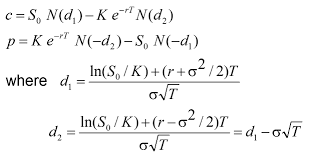

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [11]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """


    d1 = (np.log(S/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if option == 'call':
        premium = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
    if option == 'put':
        premium =  K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)

    return premium

In [12]:
N = 100
T = 3.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [13]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
1200.0,3196.439951
3500.0,896.439970
3600.0,796.439971
3700.0,696.439972
3800.0,596.439973


In [14]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
1200.0,3171.20
3500.0,795.37
3600.0,804.78
3700.0,582.47
3800.0,483.64


In [15]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
1200.0,3196.439951,3171.20
3500.0,896.439970,795.37
3600.0,796.439971,804.78
3700.0,696.439972,582.47
3800.0,596.439973,483.64
3850.0,546.439973,304.47
3890.0,506.439974,295.79
3900.0,496.439974,328.43
3910.0,486.439974,322.44
3925.0,471.439974,264.14


<Axes: >

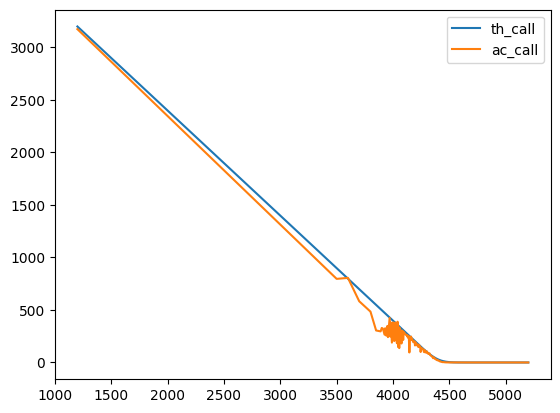

In [16]:
call.plot() #plotting the actual and theoretical call prices

In [17]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
1600.0,0.000000e+00
1800.0,0.000000e+00
2000.0,0.000000e+00
2200.0,0.000000e+00
2400.0,8.710728e-261


In [18]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
1600.0,0.10
1800.0,0.15
2000.0,0.07
2200.0,0.05
2400.0,0.05


In [19]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
4470.0,80.742881,74.05
4475.0,84.932506,105.79
4480.0,89.197774,76.91
4490.0,97.935454,132.10
4500.0,106.917184,100.80
4515.0,120.767805,138.66
4520.0,125.468726,164.41
4525.0,130.205293,163.23
4530.0,134.974014,181.55
4550.0,154.308694,189.57


<Axes: >

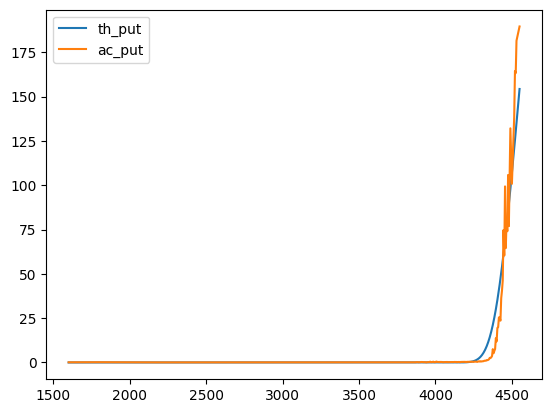

In [20]:
put.plot()